In [ ]:
'Calculating phylogenetic distances'
'Differences between phylogenetic distance in benign and pathogenic'

(303, 207)
           -5P     -5G     -5A     -5C     -5S     -5T     -5V     -5I  \
AAK1    0.0720  0.0245  0.0284  0.0456  0.0425  0.0425  0.0951  0.1554   
ACVR2A  0.0415  0.0481  0.0584  0.0489  0.0578  0.0578  0.0598  0.0625   
ACVR2B  0.0533  0.0517  0.0566  0.0772  0.0533  0.0533  0.0543  0.0442   
AKT1    0.0603  0.0594  0.0552  0.0605  0.0516  0.0516  0.0427  0.0435   
AKT2    0.0602  0.0617  0.0643  0.0582  0.0534  0.0534  0.0433  0.0418   

           -5L     -5M  ...      4H      4K      4R      4Q      4N      4D  \
AAK1    0.0993  0.0864  ...  0.0560  0.0831  0.0928  0.0635  0.0592  0.0389   
ACVR2A  0.0596  0.0521  ...  0.0573  0.0527  0.0491  0.0616  0.0556  0.0640   
ACVR2B  0.0471  0.0516  ...  0.0561  0.0451  0.0486  0.0585  0.0532  0.0730   
AKT1    0.0464  0.0505  ...  0.0663  0.1145  0.1082  0.0735  0.0649  0.0443   
AKT2    0.0493  0.0513  ...  0.0679  0.1155  0.0990  0.0652  0.0623  0.0362   

            4E      4s      4t      4y  
AAK1    0.0457  0.0251  0.02

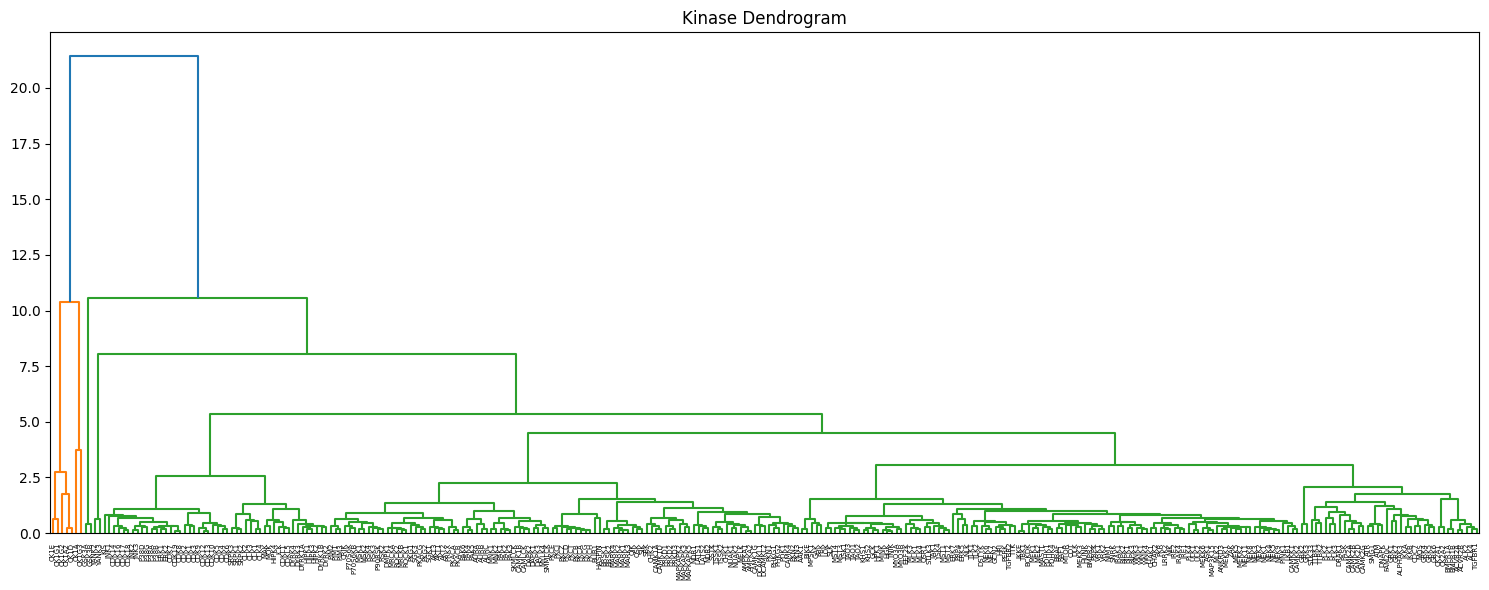

In [8]:
import pandas as pd

ser_thr_matrice_path = r"C:\Users\ricea\OneDrive\Documents\GitHub\Annabel-BSc-Project\Phylogenetic Distances\ser_thr_all_norm_matrices.csv"
df = pd.read_csv(ser_thr_matrice_path, index_col=0)
print(df.shape)
print(df.head())

from scipy.cluster.hierarchy import linkage, dendrogram
from scipy.spatial.distance import pdist
import matplotlib.pyplot as plt

# Calculate pairwise distances (Euclidean)
distances = pdist(df.values, metric='euclidean')

# Generate linkage matrix using Ward’s method (as in the paper)
linkage_matrix = linkage(distances, method='ward')

# Optional: visualize dendrogram
plt.figure(figsize=(15, 6))
dendrogram(linkage_matrix, labels=df.index.tolist(), leaf_rotation=90)
plt.title("Kinase Dendrogram")
plt.tight_layout()
plt.show()


C:\Users\ricea\AppData\Local\Temp\ipykernel_8700\1651236177.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Type', y='Distance', palette='Set2')


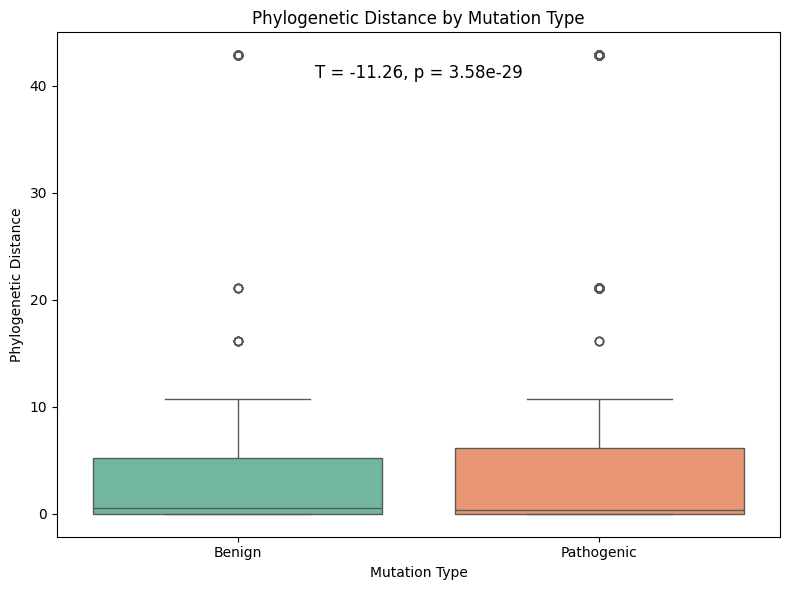

In [15]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind
import os

# Path to your CSV file
csv_path = r"C:\Users\ricea\OneDrive\Documents\GitHub\Annabel-BSc-Project\Phylogenetic Distances\phylo_distances_filtered.csv"
output_path = os.path.join(os.path.dirname(csv_path), "filtered_phylo_distance_boxplot.png")

# Load data
df = pd.read_csv(csv_path)

# T-test between groups
benign = df[df["Type"] == "Benign"]["Distance"]
pathogenic = df[df["Type"] == "Pathogenic"]["Distance"]
t_stat, p_val = ttest_ind(benign, pathogenic, equal_var=False)

# Plot
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='Type', y='Distance', palette='Set2')
plt.title('Phylogenetic Distance by Mutation Type')
plt.ylabel('Phylogenetic Distance')
plt.xlabel('Mutation Type')

# Annotate with stats
plt.text(0.5, df["Distance"].max() * 0.95,
         f"T = {t_stat:.2f}, p = {p_val:.2e}",
         ha='center', fontsize=12)

plt.tight_layout()
plt.savefig(output_path, dpi=300)
plt.show()


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import pearsonr, spearmanr

# Load phylogenetic distance data (already filtered)
csv_path = r"C:\Users\ricea\OneDrive\Documents\GitHub\Annabel-BSc-Project\Phylogenetic Distances\phylo_distances_filtered.csv"
df_dist = pd.read_csv(csv_path)
df_dist = df_dist.rename(columns={"Position": "Amino_acid_position"})  
# Load mutation metadata (contains LCS_Ratio)
df_lcs = pd.read_csv("all_LCS_values.csv")

# Merge on UniProt_ID and Amino_acid_position
merged = pd.merge(
    df_dist,
    df_lcs[["UniProt_ID", "Amino_acid_position", "LCS_Ratio"]],
    on=["UniProt_ID", "Amino_acid_position"],
    how="inner"
)

# Drop any missing values
merged = merged.dropna(subset=["Distance", "LCS_Ratio"])

# Correlation
pearson_corr, pearson_p = pearsonr(merged["LCS_Ratio"], merged["Distance"])
spearman_corr, spearman_p = spearmanr(merged["LCS_Ratio"], merged["Distance"])

# Plot
plt.figure(figsize=(8, 6))
sns.regplot(data=merged, x="Distance", y="LCS_Ratio", scatter_kws={'alpha':0.6})
plt.title(f"LCS Ratio vs Phylogenetic Distance\n"
          f"Pearson r = {pearson_corr:.2f}, p = {pearson_p:.3g} | "
          f"Spearman ρ = {spearman_corr:.2f}, p = {spearman_p:.3g}")
plt.xlabel("Phylogenetic Distance")
plt.ylabel("LCS Ratio")
plt.tight_layout()
plt.savefig("LCS_vs_phylo_distance.png", dpi=300)
plt.show()
